In [1]:
print("sona")


sona


In [2]:
#pip install numpy pandas matplotlib seaborn scikit-learn

In [3]:
# Importing necessary libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from warnings import filterwarnings

filterwarnings('ignore')

In [4]:
df = pd.read_csv('air quality data.csv')
df.head() # Top 5 rows!

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [5]:
# Shape_rows and cols!
df.shape


(29531, 16)

In [6]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [7]:
# to know the duplicate values

df.duplicated().sum()

0

In [8]:
# To check missing values

df.isnull().sum()


City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [9]:
# Drop the rows where 'AQI' has missing values
df.dropna(subset=['AQI'], inplace=True)

In [10]:
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [11]:
df.shape


(24850, 16)

# Summary of Statistics in the dataset
df.describe().T

In [13]:
# Percentage of the null values
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_percentage

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
City           0.000000
Date           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

## WEEK 2 - VISUALIZATION

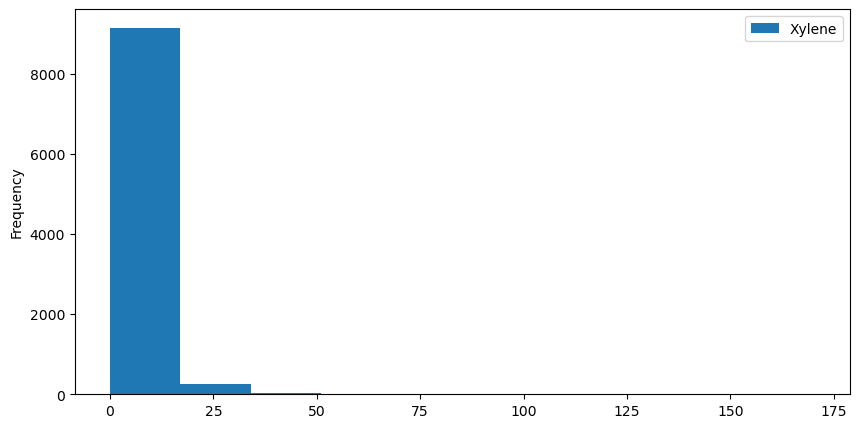

In [15]:
# Univariate analysis
df['Xylene'].plot(kind = 'hist', figsize=(10,5))
plt.legend()

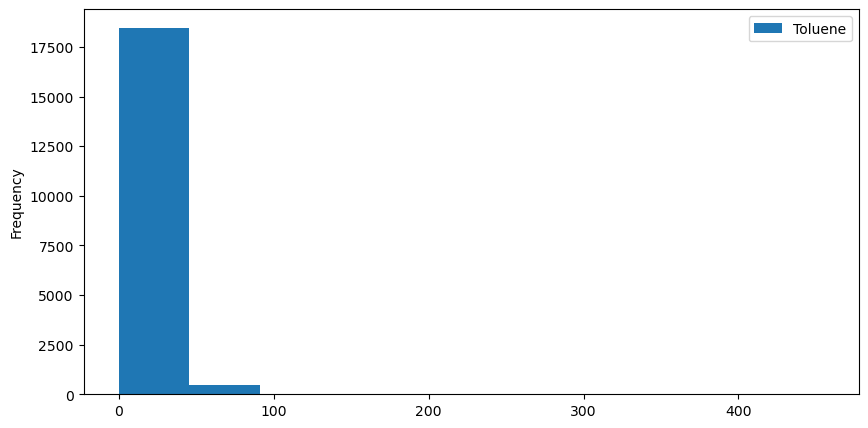

In [16]:
df ['Toluene'].plot(kind = 'hist', figsize=(10,5))

plt.legend()

plt.show()

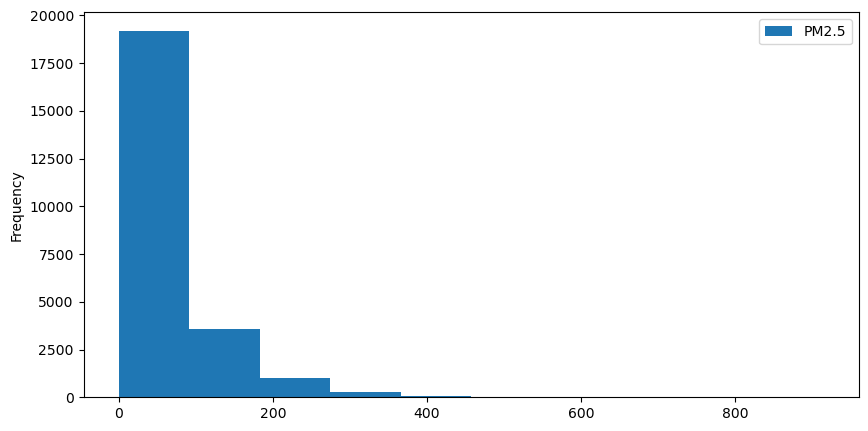

In [17]:
df ['PM2.5'].plot(kind= 'hist', figsize=(10,5))

plt.legend()

plt.show()

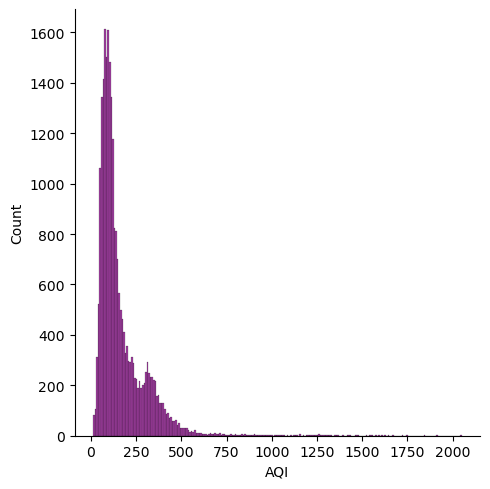

In [18]:
# Distribution of AQi from 2015 to 2020

sns.displot(df, x='AQI', color='purple')

plt.show ()

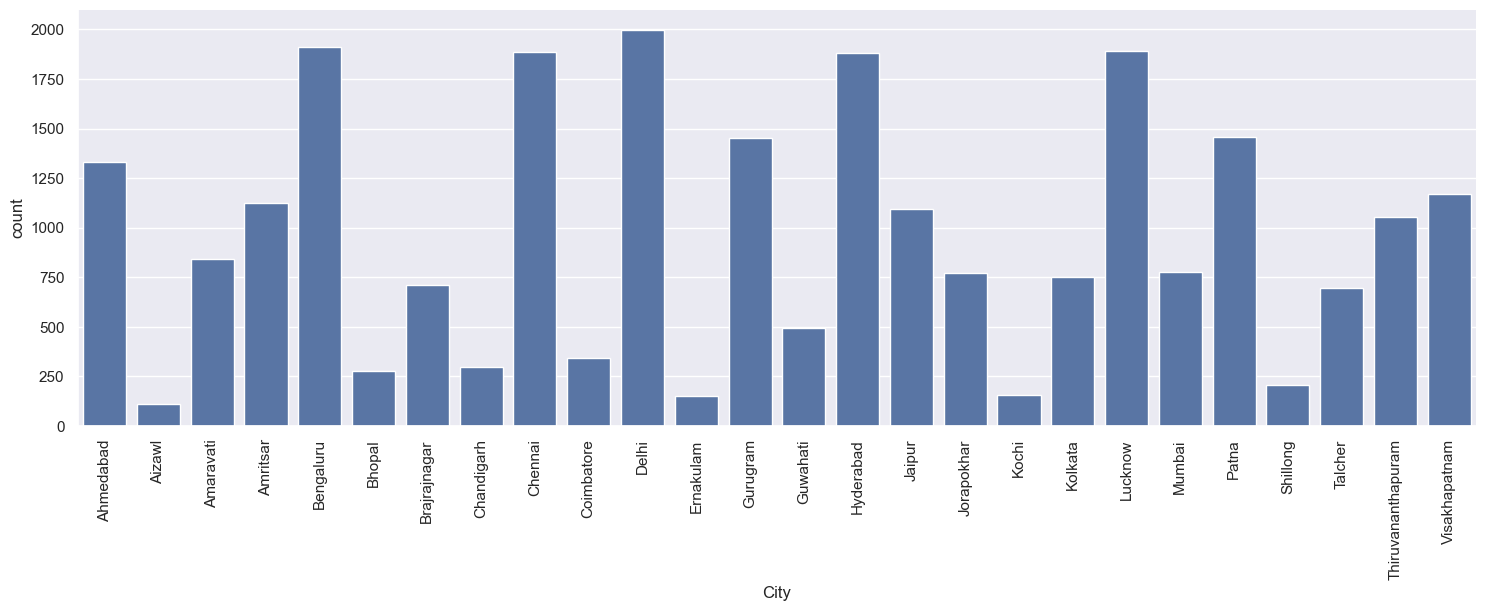

In [19]:
# Bivariate
sns.set_theme(style="darkgrid")

graph=sns.catplot(x="City", kind='count', data=df, height=5, aspect=3)

graph.set_xticklabels(rotation=90)

In [20]:
df.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [21]:
#IOR Method 03 01
def replace_outliers(df):
  for column in df.select_dtypes(include=['number']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1 
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    df[column] = df[column].apply(
        lambda x: Q1 if x < lb else (Q3 if x> ub else x)
    )
  return df



In [22]:
df = replace_outliers(df)

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,55.260713,32.910786,0.04,29.0000,48.785,80.921250,158.80
PM10,17764.0,105.338640,60.235533,0.03,56.7775,96.180,150.180625,289.95
NO,24463.0,12.517884,8.955014,0.03,5.6600,9.910,20.030000,41.58
NO2,24459.0,25.972275,17.006150,0.01,11.9400,22.100,38.240000,77.68
NOx,22993.0,26.756914,17.712288,0.00,13.1100,23.680,40.170000,80.72
NH3,18314.0,20.013266,13.893247,0.01,8.9600,16.310,30.360000,62.45
CO,24405.0,1.004899,0.576547,0.00,0.5900,0.930,1.480000,2.81
SO2,24245.0,10.300662,5.819469,0.01,5.7300,9.220,15.140000,29.22
O3,24043.0,33.274368,18.033165,0.01,19.2500,31.250,46.080000,86.29
Benzene,21315.0,1.859195,1.862739,0.00,0.2300,1.290,3.340000,8.00


In [24]:

df1=df.drop(columns=['City'])

# week 3 - Data Modeling - 10 March 2025

In [26]:
df.drop(['Date', 'City'], axis = 1, inplace=True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,83.130,NaN,6.93,28.71,33.72,NaN,1.48,15.14,59.76,0.02,0.00,3.14,209.0,Poor
29,79.840,NaN,13.85,28.68,41.08,NaN,1.48,15.14,46.08,0.04,0.00,4.81,328.0,Very Poor
30,94.520,NaN,24.39,32.66,52.61,NaN,1.48,15.14,46.08,0.24,0.01,7.67,208.0,Severe
31,135.990,NaN,20.03,42.08,40.17,NaN,1.48,15.14,46.08,0.40,0.04,4.12,208.0,Severe
32,80.925,NaN,20.03,35.31,72.80,NaN,1.48,15.14,46.08,0.46,0.06,4.12,208.0,Severe


In [27]:
df = pd.DataFrame(df1, columns=df.columns)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,83.130,NaN,6.93,28.71,33.72,NaN,1.48,15.14,59.76,0.02,0.00,3.14,209.0,Poor
29,79.840,NaN,13.85,28.68,41.08,NaN,1.48,15.14,46.08,0.04,0.00,4.81,328.0,Very Poor
30,94.520,NaN,24.39,32.66,52.61,NaN,1.48,15.14,46.08,0.24,0.01,7.67,208.0,Severe
31,135.990,NaN,20.03,42.08,40.17,NaN,1.48,15.14,46.08,0.40,0.04,4.12,208.0,Severe
32,80.925,NaN,20.03,35.31,72.80,NaN,1.48,15.14,46.08,0.46,0.06,4.12,208.0,Severe


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [30]:
# Feature & Target Selection
X = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
        'Benzene', 'Toluene', 'Xylene']]
y = df['AQI']

In [31]:
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
28,83.130,NaN,6.93,28.71,33.72,NaN,1.48,15.14,59.76,0.02,0.00,3.14
29,79.840,NaN,13.85,28.68,41.08,NaN,1.48,15.14,46.08,0.04,0.00,4.81
30,94.520,NaN,24.39,32.66,52.61,NaN,1.48,15.14,46.08,0.24,0.01,7.67
31,135.990,NaN,20.03,42.08,40.17,NaN,1.48,15.14,46.08,0.40,0.04,4.12
32,80.925,NaN,20.03,35.31,72.80,NaN,1.48,15.14,46.08,0.46,0.06,4.12


In [32]:
#Split the data into training and testing data Training set 80% | Testing set20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of X Train',X_train.shape)
print('Shape of X Test',X_test.shape)
print('Shape of y Train',y_train.shape)
print('Shape of y Test',y_test.shape)

Shape of X Train (19880, 12)
Shape of X Test (4970, 12)
Shape of y Train (19880,)
Shape of y Test (4970,)


In [33]:
# Linear Regression Model
LR = LinearRegression()
LR.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
 # Predicting the values:
train_pred = LR.predict(X_train) # Predicting train
test_pred = LR.predict(X_test) # Predicting test

In [ ]:
# Evaluation for Linear Regression
RMSE_train = (np.sqrt(mean_squared_error(y_train, train_pred)))
RMSE_test = (np.sqrt(mean_squared_error(y_test, test_pred)))
print('RMSE Train Data = ', str(RMSE_train))
print('RMSE Test Data = ', str(RMSE_test))
print('_'* 60)
print('R Squared value for Train = ', LR.score(X_train, y_train))
print('R Squared value on Test = ', LR.score(X_test, y_test))

In [ ]:
# KNN...
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
def train_knn_model(
    X_train: pd.DataFrame, 
    y_train: pd.Series,
    n_neighbors: int = 5,
    weights: str = 'uniform',
    metric: str = 'minkowski'
) -> KNeighborsRegressor:
    """
    Trains a K-Nearest Neighbors regression model with specified parameters.
    
    Args:
        X_train (pd.DataFrame): Training features
        y_train (pd.Series): Target values
        n_neighbors (int, optional): Number of neighbors. Defaults to 5.
        weights (str, optional): Weight function used in prediction. Defaults to 'uniform'.
        metric (str, optional): Distance metric. Defaults to 'minkowski'.
    
    Returns:
        KNeighborsRegressor: Trained KNN model
    """
    knn_model = KNeighborsRegressor(
        n_neighbors=n_neighbors,
        weights=weights,
        metric=metric
    )
    knn_model.fit(X_train, y_train)
    
    return knn_model